# Lab Assignment: Building a Neural Network from Scratch

### Objective
This lab guides you through the implementation of a simple feedforward neural network from scratch. 
By completing this lab, you will:
- Initialize a neural network with weights and biases.
- Compute the weighted sum at each node.
- Apply activation functions for node outputs.
- Perform forward propagation to compute predictions.
- Implement backpropagation to compute gradients.
- Update weights using gradients to minimize the loss.

## Step 1: Initialize the Network

In [1]:
# Import Statements
import numpy as np
import matplotlib.pyplot as plt
from random import seed

# Set a fixed seed for reproducability
np.random.seed(42)

# Initialize the network
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    num_nodes_previous = num_inputs # number of nodes in the previous layer

    network = {}
    
    # loop through each layer and randomly initialize the weights and biases associated with each layer
    for layer in range(num_hidden_layers + 1):
        
        if layer == num_hidden_layers:
            layer_name = 'output' # name last layer in the network output
            num_nodes = num_nodes_output
        else:
            layer_name = 'layer_{}'.format(layer + 1) # otherwise give the layer a number
            num_nodes = num_nodes_hidden[layer] 
        
        # initialize weights and bias for each node
        network[layer_name] = {}
        for node in range(num_nodes):
            node_name = 'node_{}'.format(node+1)
            network[layer_name][node_name] = {
                'weights': np.around(np.random.uniform(size=num_nodes_previous), decimals=2),
                'bias': np.around(np.random.uniform(size=1), decimals=2),
            }
    
        num_nodes_previous = num_nodes

    return network # return the network

# Initialize a network with 3 inputs, 2 hidden layers (4 and 3 nodes), and 1 output node
network = initialize_network(3, 2, [4, 3], 1)
print("Jace Marden + Initialized Network:")
network

Jace Marden + Initialized Network:


{'layer_1': {'node_1': {'weights': array([0.37, 0.95, 0.73]),
   'bias': array([0.6])},
  'node_2': {'weights': array([0.16, 0.16, 0.06]), 'bias': array([0.87])},
  'node_3': {'weights': array([0.6 , 0.71, 0.02]), 'bias': array([0.97])},
  'node_4': {'weights': array([0.83, 0.21, 0.18]), 'bias': array([0.18])}},
 'layer_2': {'node_1': {'weights': array([0.3 , 0.52, 0.43, 0.29]),
   'bias': array([0.61])},
  'node_2': {'weights': array([0.14, 0.29, 0.37, 0.46]),
   'bias': array([0.79])},
  'node_3': {'weights': array([0.2 , 0.51, 0.59, 0.05]),
   'bias': array([0.61])}},
 'output': {'node_1': {'weights': array([0.17, 0.07, 0.95]),
   'bias': array([0.97])}}}

## Step 2: Compute Weighted Sum

In [2]:
# Weighted sum at each node is computed as the dot product of the inputs and the weights plus the bias
def compute_weighted_sum(inputs, weights, bias):
    # Please numpy dot to calcuate the compute weighted with linear (implicit dot) then add bias 
    return np.sum(inputs * weights) + bias

# Test weighted sum
inputs = np.array([0.5, 0.2, 0.1])
print('Inputs : ', inputs)

first_node_weight_sum = compute_weighted_sum(inputs, network['layer_1']['node_1']['weights'], network['layer_1']['node_1']['bias'])
print("Jace Marden + Weighted Sum at First Node:", first_node_weight_sum)

Inputs :  [0.5 0.2 0.1]
Jace Marden + Weighted Sum at First Node: [1.048]


## Step 3: Compute Node Activation

In [3]:
#Take weighted sum as input and returns the non-linear transformation using sigmoid
# use this to compute output first node in first hidden layer
def node_activation(weighted_sum):
    return 1.0 / (1.0 + np.exp(-1 * weighted_sum))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def sigmoid_derivative (a):
    return a * (1 - a)

# Compute activation for the weighted sum
node_weights = network['layer_1']['node_1']['weights']
node_bias = network['layer_1']['node_1']['bias']
node_output = node_activation(compute_weighted_sum(inputs, node_weights, node_bias))

print("Jace Marden + Activation:", node_output)

Jace Marden + Activation: [0.74039066]


## Step 4: Perform Forward Propagation

In [4]:
def forward_propagation(network, inputs):
    activations = [inputs]  # Start with the input layer
    for layer in network.values():
        z = []
        a = []
        for node in layer.values():
            z_value = np.dot(activations[-1], node['weights']) + node['bias']
            z.append(z_value)
            a.append(sigmoid(z_value))
        activations.append(np.array(a).flatten())
    return activations

# Perform forward propagation
activations = forward_propagation(network, inputs)
print("Jace Marden + Final Output:", activations[-1])
print('Activations : ')
activations

Jace Marden + Final Output: [0.87753786]
Activations : 


[array([0.5, 0.2, 0.1]),
 array([0.74039066, 0.7286927 , 0.80439608, 0.65813632]),
 array([0.85167349, 0.84623151, 0.83715521]),
 array([0.87753786])]

## Step 5: Backpropagation and Update Weights

In [5]:
# Backprop with updates from Quiz 4.3
def backpropagation_with_updates(network, activations, y_true, learning_rate):
    """
    Perform backpropagation to calculate gradients and update weights for each layer.
    Arguments:
        network: Dictionary containing layers with weights and biases.
        activations: List of activations from forward propagation.
        y_true: Ground truth labels.
        learning_rate: Learning rate for weight updates.
    Returns:
        network: Updated network with modified weights and biases.
    """

    # print(network)
    # print(activations)
    # print(y_true)
    # print(learning_rate)
    
    # Step 1: Compute deltas for the output layer
    # Calculate the error (delta) for the output layer by comparing the predicted output (activations[-1])
    # with the true labels (y_true) and applying the derivative of the activation function.
    delta_output = (activations[-1] - y_true) * sigmoid_derivative(activations[-1])

    # Step 2: Backpropagate through each layer
    # Iterate through the layers in reverse order (from output to input)
    for layer_idx in reversed(range(len(network))):
        # Get the current layer's name and data
        layer_name = list(network.keys())[layer_idx]
        current_layer = network[layer_name]

        if layer_name == 'output':
            # For the output layer, use the precomputed delta
            delta = delta_output
            # print('Output Delta : ', delta)
        else:
            # For hidden layers, compute the delta by propagating the error backward
            # Multiply the current delta with the weights of the next layer (transposed),
            # then apply the derivative of the activation function.
            
            next_layer_name = list(network.keys())[layer_idx + 1]
            next_layer = network[next_layer_name]
            weight_matrix = np.array([node['weights'] for node in next_layer.values()])
#             print('weight_matrix:',weight_matrix)
            
            #Apply the derivative of the activation function to scale the delta for the current layer.
            # This ensures the gradient respects the activation function's behavior.
            delta = np.dot(delta, weight_matrix) * sigmoid_derivative(activations[layer_idx + 1])
            # print('Else Delta : ', delta)

        # Loop through each node in the current layer
        for node_idx, (node_name, node_data) in enumerate(current_layer.items()):
            # Get the activations from the previous layer (or input for the first hidden layer)
            a_prev = activations[layer_idx]
            
            # Compute the gradients for weights (dW) and biases (db)
            dW = delta[node_idx] * a_prev  # Gradient of weights
            db = delta[node_idx]           # Gradient of biases

            # Update weights and biases using gradient descent
            current_layer[node_name]['weights'] -= learning_rate * dW  # Update weights
            current_layer[node_name]['bias'] -= learning_rate * db     # Update bias

    # Return the updated network with modified weights and biases
    return network

# Compute gradients
y_true = np.array([[1]])  # Example target output
learning_rate = 0.1
network = backpropagation_with_updates(network, activations, y_true, learning_rate)
print("Jace Marden + Updated Network:")
network

Jace Marden + Updated Network:


{'layer_1': {'node_1': {'weights': array([0.37000427, 0.95000171, 0.73000085]),
   'bias': array([0.60000853])},
  'node_2': {'weights': array([0.16001042, 0.16000417, 0.06000208]),
   'bias': array([0.87002083])},
  'node_3': {'weights': array([0.60000924, 0.7100037 , 0.02000185]),
   'bias': array([0.97001848])},
  'node_4': {'weights': array([0.83000252, 0.21000101, 0.1800005 ]),
   'bias': array([0.18000504])}},
 'layer_2': {'node_1': {'weights': array([0.30002106, 0.52002073, 0.43002288, 0.29001872]),
   'bias': array([0.61002845])},
  'node_2': {'weights': array([0.14000902, 0.29000887, 0.3700098 , 0.46000801]),
   'bias': array([0.79001218])},
  'node_3': {'weights': array([0.20012634, 0.51012434, 0.59013726, 0.0501123 ]),
   'bias': array([0.61017064])}},
 'output': {'node_1': {'weights': array([0.17112084, 0.07111368, 0.95110173]),
   'bias': array([0.97131604])}}}

## Step 6: Visualizing Loss Changes

In [6]:
# Use MSE to compute the loss 
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [7]:
# Training Loop
losses = []

#Training over 1000 iterations due to lower learning rate making line appear linear
for iteration in range(1000):
    # compute activations
    activations = forward_propagation(network, inputs) #forward
    # compute_loss for y_true and activations[-1]
    loss = compute_loss(y_true, activations[-1])
    # add loss to losses
    losses.append(loss)

    # backpropagation
    # update_weights
    network = backpropagation_with_updates(network, activations, y_true, learning_rate)

<function matplotlib.pyplot.show(close=None, block=None)>

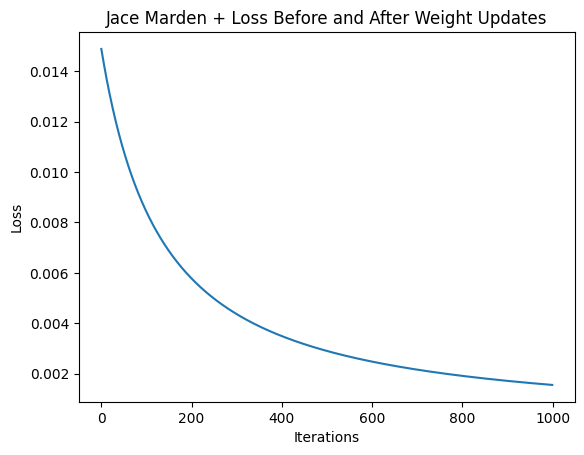

In [8]:
# Plot Loss and rerun all cells
plt.plot(losses)
plt.title("Jace Marden + Loss Before and After Weight Updates")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show
#